3. Exploración
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose       

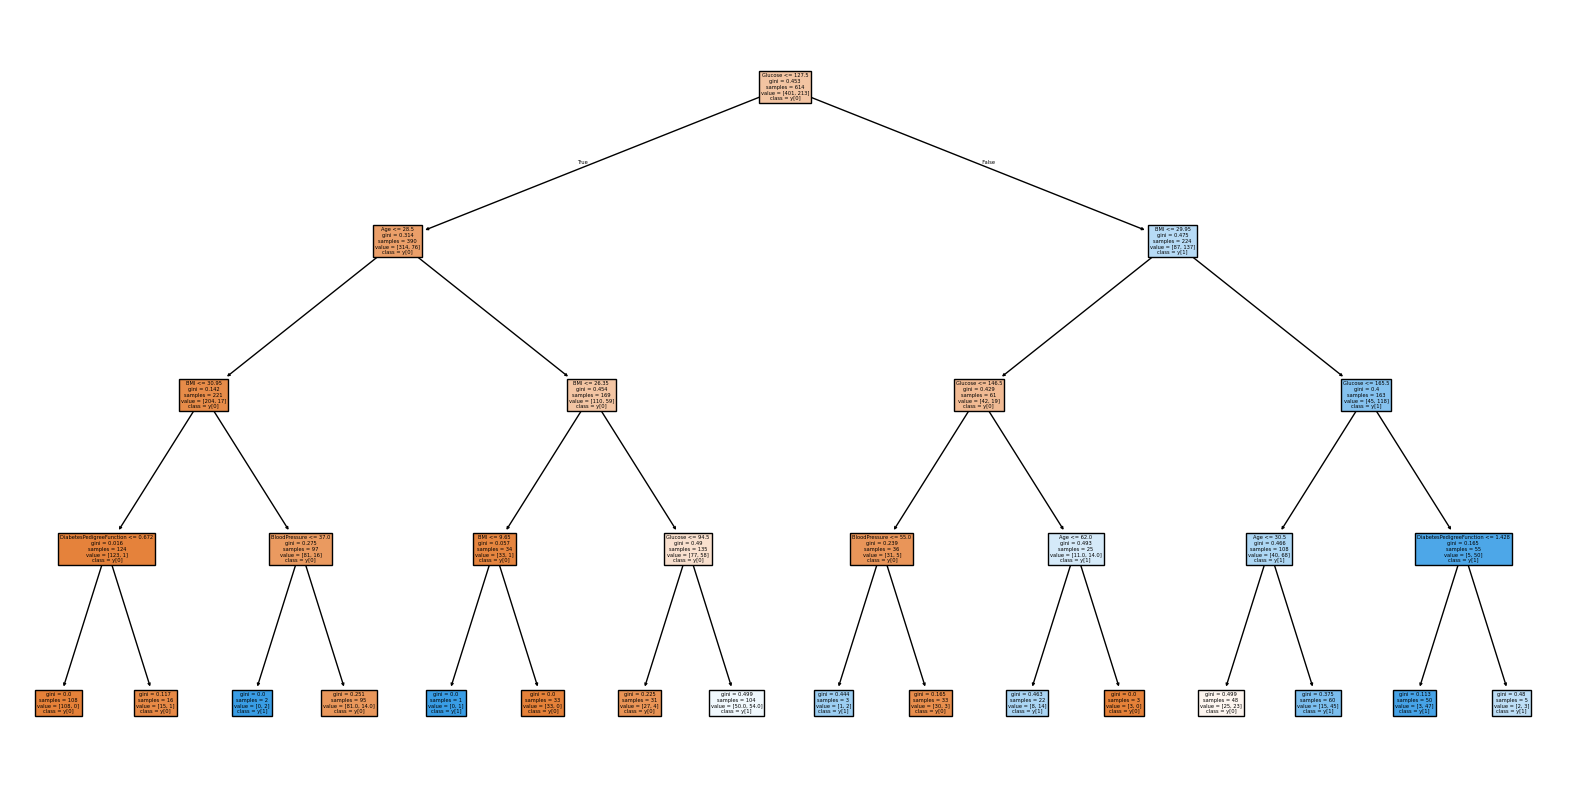

In [1]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Cargar dataset
df = pd.read_csv("/workspaces/Taller-clasificacion/diabetes.csv", engine='python')  # Cambia la ruta al CSV descargado

# 3. Exploración de datos (EDA)
print("3. Exploración")
print(df.head())
print(df.info())
print(df.describe())

# 4. Preprocesamiento
# Aquí conviertes variables categóricas, eliminas nulos, normalizas si es necesario
print("4. preprocsamiento")
df = df.dropna()  # Ejemplo básico

# 5. Dividir en variables predictoras (X) y variable objetivo (y)
# X = df.drop("target_column", axis=1)  # Reemplaza con el nombre correcto
# y = df["target_column"]
print("5. Dividir variables predictorias")
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


# 6. Dividir en entrenamiento y prueba
print("6. Entrenamiento y prueba")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Entrenar modelo
print("7. Entrenar modeo")
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 8. Predicciones
print("8. predicciones")
y_pred = model.predict(X_test)

# 9. Evaluación
print("9. Evaluación")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# 10. Visualización del árbol
print("10. arbol")
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.show()
